In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [72]:
df = pd.read_csv('/content/climatechange_posts.csv')
df

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7092015599932476677,2022-04-29,6821135646233756677,brilliant 👏 @extinctionrebellionxr #climatecha...,['https://v77.tiktokcdn-eu.com/9eb540e4990059d...,12010,1847866,4959
1,7092026091790978309,2022-04-29,7067228955833746437,"While the #ClimateCrisis escalates, #HSBC cont...",['https://v45.tiktokcdn-eu.com/f66cb4b9ad9fb0f...,2407,404953,1183
2,7092130889127185707,2022-04-29,7055021520643507247,#greenscreenvideo ANSWER: BOYCOTT 🚫 #boycottco...,['https://v77.tiktokcdn-eu.com/52305da5f9e66d8...,414,146334,493
3,7092015599932476677,2022-04-29,6821135646233756677,brilliant 👏 @extinctionrebellionxr #climatecha...,['https://v45.tiktokcdn-eu.com/eb1a3c013ab693b...,12010,1847866,4961
4,7092130889127185707,2022-04-29,7055021520643507247,#greenscreenvideo ANSWER: BOYCOTT 🚫 #boycottco...,['https://v77.tiktokcdn-eu.com/9832a2d028c7710...,414,146334,493
...,...,...,...,...,...,...,...,...
5448,7463011394645019922,2025-01-23,7389024006199116805,130Kw Project Started #solarenergy #solarpowe...,['https://v15m.tiktokcdn-eu.com/477a57841ade7a...,0,522,6
5449,7463034460460600594,2025-01-23,7346823688509424648,PERUBAHAN IKLIM (Climate Change) Banjir lagi d...,['https://api16-normal-c-useast2a.tiktokv.com/...,5,1993,2
5450,7463010481679207698,2025-01-23,7209436712836432902,#fyppppppppppppppppppppppp #condisioner #kondi...,['https://api16-normal-c-useast2a.tiktokv.com/...,0,207,3
5451,7463034607252835591,2025-01-23,7386181999172240402,If we can’t protect Earth how do we expect to ...,['https://v77.tiktokcdn-eu.com/c61b92d661928d8...,10,2764,4


In [73]:
df.columns

Index(['id', 'createTime', 'authorId', 'text', 'video.urls', 'shareCount',
       'playCount', 'commentCount'],
      dtype='object')

In [74]:
df['createTime'] = pd.to_datetime(df['createTime'])

In [75]:
author_stats = df.groupby('authorId').agg(
    author_post_count=('id', 'count'),
    author_avg_play=('playCount', 'mean')
).reset_index()
df = df.merge(author_stats, on='authorId')

In [76]:
df['engagement_ratio'] = (df['shareCount'] + df['commentCount']) / df['playCount']
df['engagement_ratio'] = df['engagement_ratio'].replace([np.inf, -np.inf], 0)

In [77]:
df

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount,author_post_count,author_avg_play,engagement_ratio
0,7092015599932476677,2022-04-29,6821135646233756677,brilliant 👏 @extinctionrebellionxr #climatecha...,['https://v77.tiktokcdn-eu.com/9eb540e4990059d...,12010,1847866,4959,16,1103311.375,0.009183
1,7092026091790978309,2022-04-29,7067228955833746437,"While the #ClimateCrisis escalates, #HSBC cont...",['https://v45.tiktokcdn-eu.com/f66cb4b9ad9fb0f...,2407,404953,1183,2,404953.000,0.008865
2,7092130889127185707,2022-04-29,7055021520643507247,#greenscreenvideo ANSWER: BOYCOTT 🚫 #boycottco...,['https://v77.tiktokcdn-eu.com/52305da5f9e66d8...,414,146334,493,2,146334.000,0.006198
3,7092015599932476677,2022-04-29,6821135646233756677,brilliant 👏 @extinctionrebellionxr #climatecha...,['https://v45.tiktokcdn-eu.com/eb1a3c013ab693b...,12010,1847866,4961,16,1103311.375,0.009184
4,7092130889127185707,2022-04-29,7055021520643507247,#greenscreenvideo ANSWER: BOYCOTT 🚫 #boycottco...,['https://v77.tiktokcdn-eu.com/9832a2d028c7710...,414,146334,493,2,146334.000,0.006198
...,...,...,...,...,...,...,...,...,...,...,...
5448,7463011394645019922,2025-01-23,7389024006199116805,130Kw Project Started #solarenergy #solarpowe...,['https://v15m.tiktokcdn-eu.com/477a57841ade7a...,0,522,6,1,522.000,0.011494
5449,7463034460460600594,2025-01-23,7346823688509424648,PERUBAHAN IKLIM (Climate Change) Banjir lagi d...,['https://api16-normal-c-useast2a.tiktokv.com/...,5,1993,2,1,1993.000,0.003512
5450,7463010481679207698,2025-01-23,7209436712836432902,#fyppppppppppppppppppppppp #condisioner #kondi...,['https://api16-normal-c-useast2a.tiktokv.com/...,0,207,3,2,207.000,0.014493
5451,7463034607252835591,2025-01-23,7386181999172240402,If we can’t protect Earth how do we expect to ...,['https://v77.tiktokcdn-eu.com/c61b92d661928d8...,10,2764,4,6,567624.000,0.005065


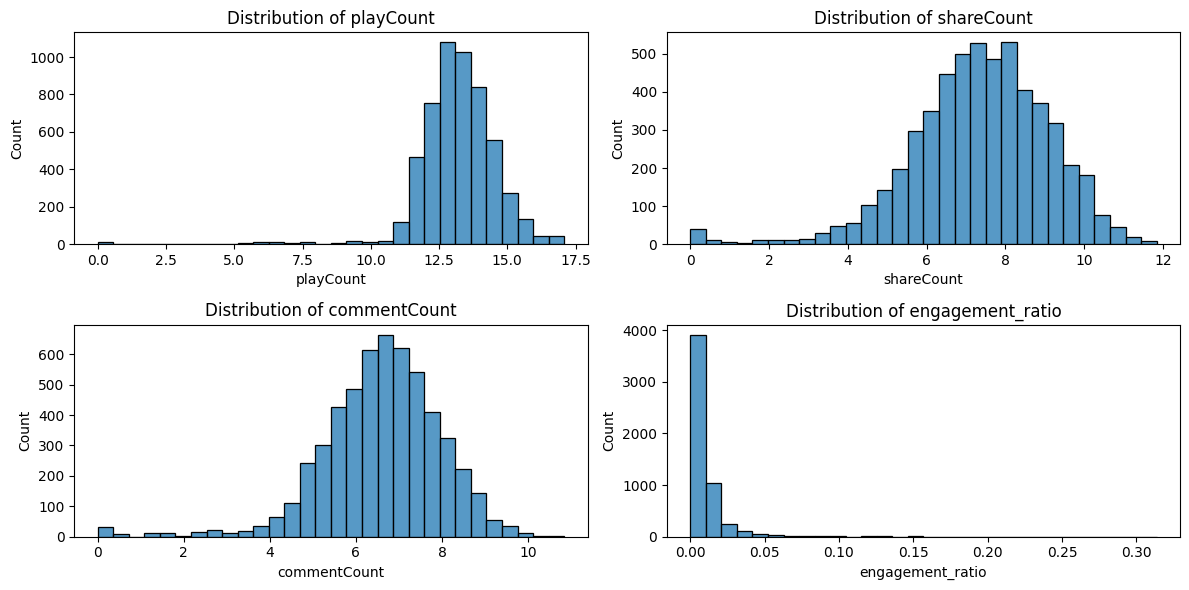

In [78]:
plt.figure(figsize=(12, 6))
metrics = ['playCount', 'shareCount', 'commentCount', 'engagement_ratio']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.histplot(np.log1p(df[metric]), bins=30)
    plt.title(f'Distribution of {metric}')
plt.tight_layout()
plt.show()

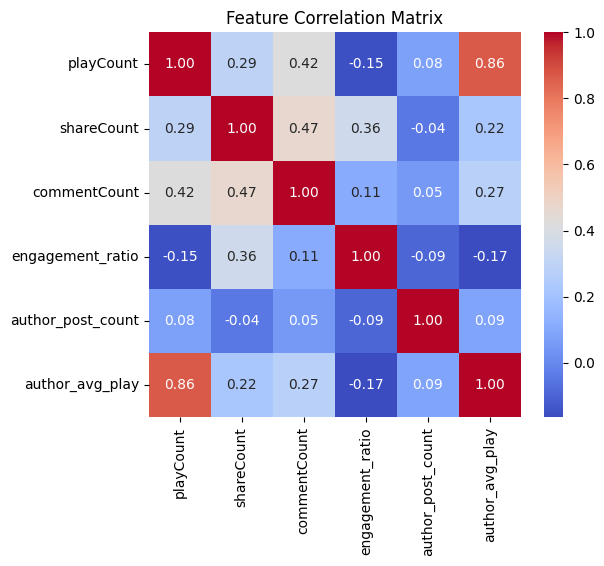

In [79]:
corr_matrix = df[['playCount', 'shareCount', 'commentCount', 'engagement_ratio',
                  'author_post_count', 'author_avg_play']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# main correlations are avg author playcount vs post playcount (obv famous guys get more plays)
# and correlation between sharecount, playcount and commentcount (weak ones, but also trivial)

In [80]:
df.columns

Index(['id', 'createTime', 'authorId', 'text', 'video.urls', 'shareCount',
       'playCount', 'commentCount', 'author_post_count', 'author_avg_play',
       'engagement_ratio'],
      dtype='object')

In [81]:
# we want to see how hashtag climatechange behaves with time so let's forget about useless columns

df.drop(columns=['id', 'authorId', 'text', 'author_post_count', 'author_avg_play', 'authorId', 'video.urls'], inplace=True)

In [82]:
df

,createTime,shareCount,playCount,commentCount,engagement_ratio
0,2022-04-29,12010,1847866,4959,0.009183
1,2022-04-29,2407,404953,1183,0.008865
2,2022-04-29,414,146334,493,0.006198
3,2022-04-29,12010,1847866,4961,0.009184
4,2022-04-29,414,146334,493,0.006198
...,...,...,...,...,...
5448,2025-01-23,0,522,6,0.011494
5449,2025-01-23,5,1993,2,0.003512
5450,2025-01-23,0,207,3,0.014493
5451,2025-01-23,10,2764,4,0.005065


<Figure size 600x400 with 0 Axes>

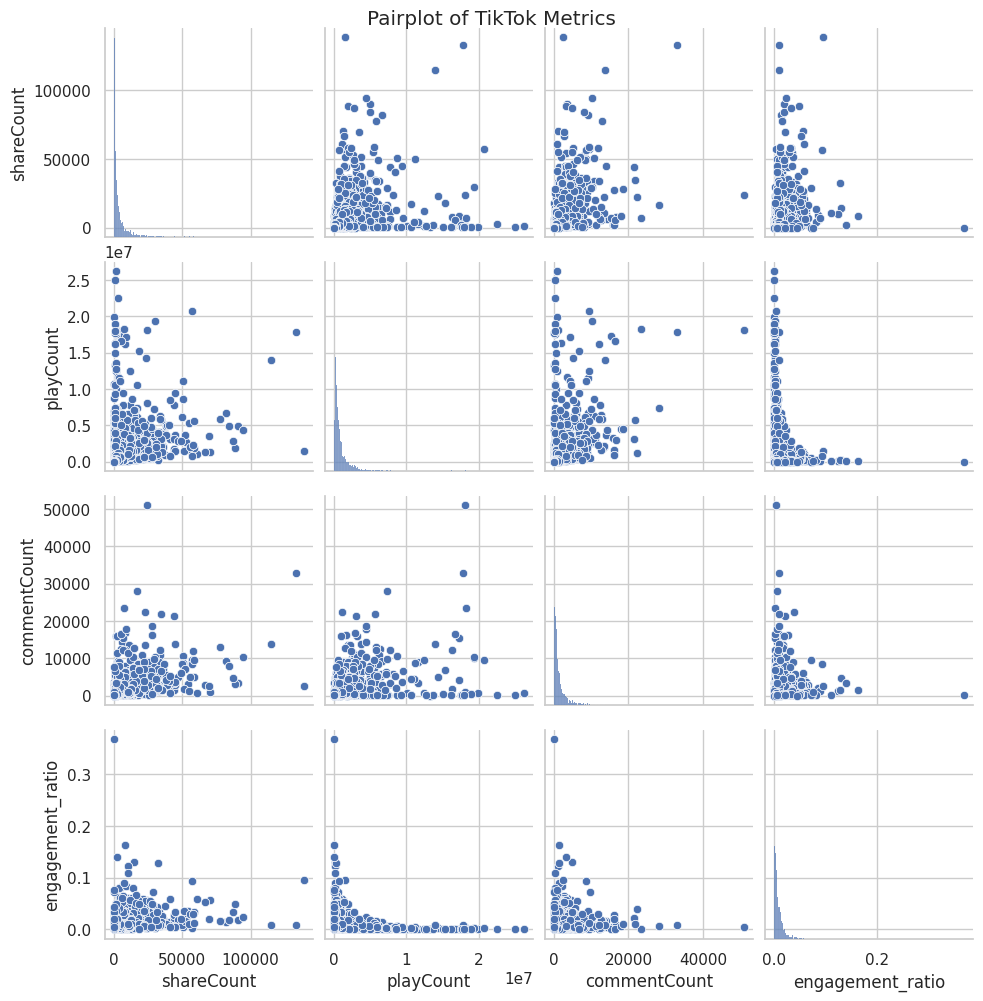

In [88]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
sns.pairplot(df, vars=['shareCount', 'playCount', 'commentCount', 'engagement_ratio'])
plt.suptitle('Pairplot of TikTok Metrics', y=1)
plt.show()

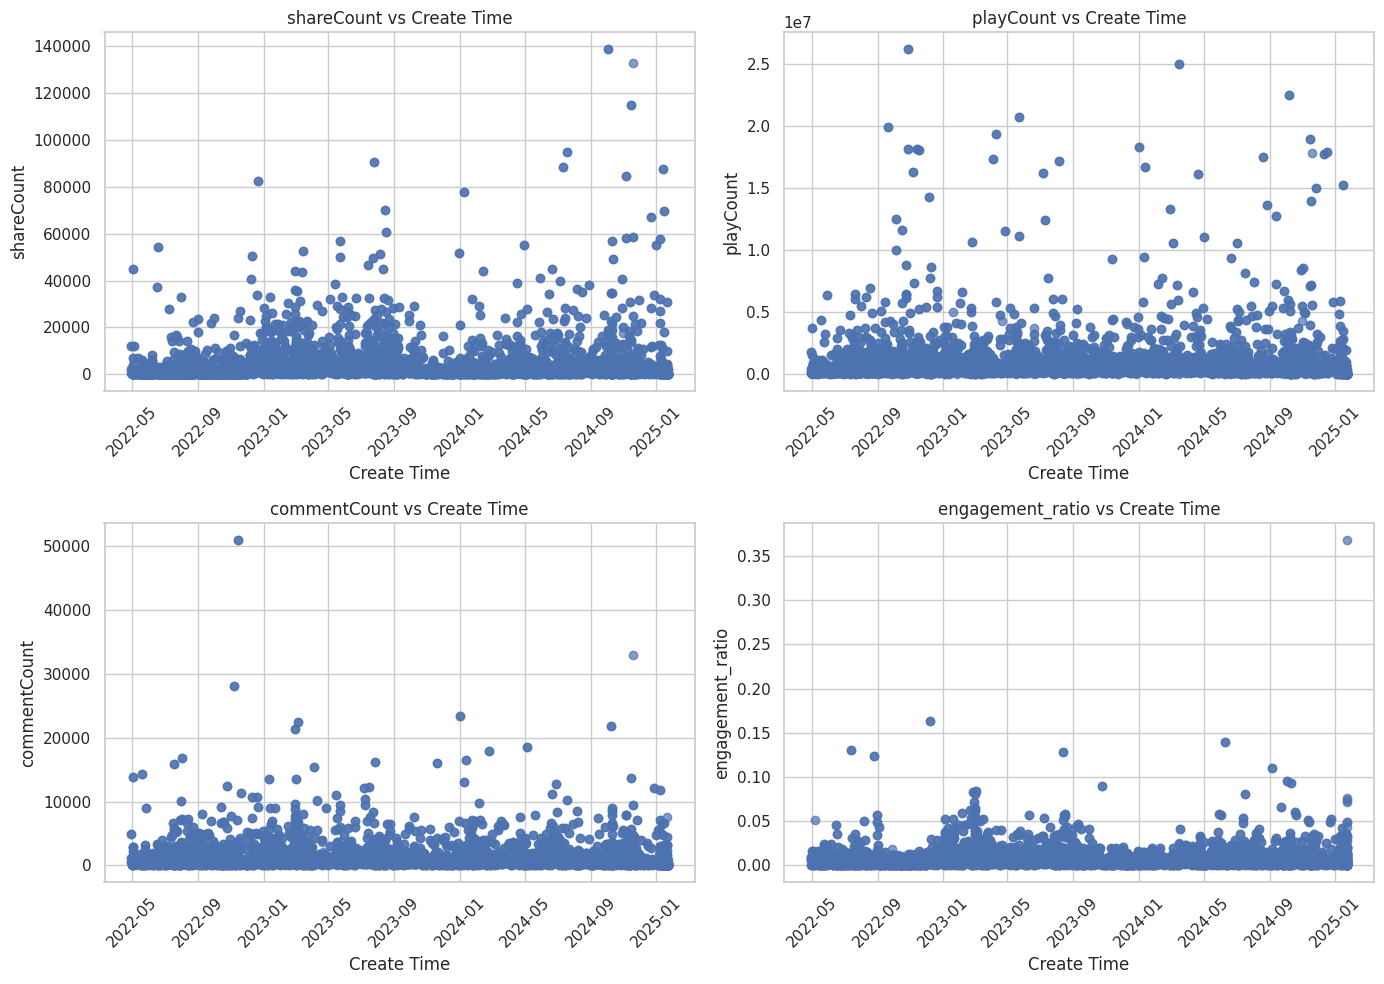

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()
for i, col in enumerate(df.columns[1:]):
    axes[i].scatter(df['createTime'], df[col], alpha=0.7, label=col)
    axes[i].set_title(f'{col} vs Create Time')
    axes[i].set_xlabel('Create Time')
    axes[i].set_ylabel(col)
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-110-af88b3a9bc29>:15: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_dates, y, degree)


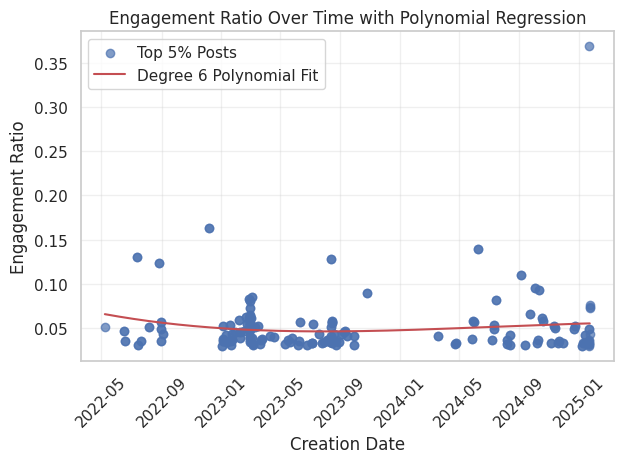

In [110]:
# let's threshold at top 5% engagement ratio posts
percent = 5
ratio = 1 - percent/100

threshold = df['engagement_ratio'].quantile(ratio)
top_posts = df[df['engagement_ratio'] >= threshold].copy()
top_posts['createTime'] = pd.to_datetime(top_posts['createTime'])

# dates into numbers
x_dates = top_posts['createTime'].map(pd.Timestamp.toordinal)
y = top_posts['engagement_ratio']

# Poly reg
degree = 6
coeffs = np.polyfit(x_dates, y, degree)
poly_fit = np.poly1d(coeffs)

# line
date_range = pd.date_range(start=top_posts['createTime'].min(),
                           end=top_posts['createTime'].max())

x_fit = date_range.map(pd.Timestamp.toordinal)
y_fit = poly_fit(x_fit)

#plt
plt.scatter(top_posts['createTime'], y, alpha=0.7, label=f'Top {percent}% Posts')
plt.plot(date_range, y_fit, 'r-', label=f'Degree {degree} Polynomial Fit')

plt.title('Engagement Ratio Over Time with Polynomial Regression')
plt.xlabel('Creation Date')
plt.ylabel('Engagement Ratio')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# no matter what I do, this data is just static